# **Introduction to the Notebook: Analysis of the World Happiness Report** 🌍😊

In this notebook, we will explore the **World Happiness Report**, which ranks 155 countries based on their happiness levels using data from the **Gallup World Poll**. This report has become a key tool for policymakers by integrating happiness indicators into decision-making.

Our analysis will focus on answering key questions, such as:

- Which countries rank the highest in overall happiness and in the six contributing factors: economic production, social support, life expectancy, freedom, absence of corruption, and generosity? 📊
- How did country rankings change between the 2015, 2016, 2017, 2018 and 2019 reports? 🔄
- Did any country experience a significant increase or decrease in happiness? 📉📈

We will conduct an **Exploratory Data Analysis (EDA)** and seek the best predictive model for happiness scores. 

Let's get started! 🚀

---

Import the libraries

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this cell, we're loading the happiness data for several years into our notebook:

In [12]:
df_2015 = pd.read_csv("../data/2015.csv")
df_2016 = pd.read_csv("../data/2016.csv")
df_2017 = pd.read_csv("../data/2017.csv")
df_2018 = pd.read_csv("../data/2018.csv")
df_2019 = pd.read_csv("../data/2019.csv")

Here, we're taking a peek at the column names for our DataFrames from 2015 to 2019:

In [13]:
print("Columns 2015: ", df_2015.columns, "\n")
print("Columns 2016: ", df_2016.columns, "\n")
print("Columns 2017: ", df_2017.columns, "\n")
print("Columns 2018: ", df_2018.columns, "\n")
print("Columns 2019: ", df_2019.columns)

Columns 2015:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') 

Columns 2016:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 

Columns 2017:  Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object') 

Columns 2018:  Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita

### 📊 **Happiness Dataframes Overview**

#### **2015**
- **Country** 🌍: Country name
- **Region** 🌎: Geographic region
- **Happiness Rank** 🏆: Country's happiness position
- **Happiness Score** 😊: Happiness score
- **Standard Error** 📉: Standard error of the score
- **Economy (GDP per Capita)** 💰: GDP per capita
- **Family** 👪: Family support
- **Health (Life Expectancy)** 🏥: Life expectancy
- **Freedom** 🕊️: Personal freedom
- **Trust (Government Corruption)** 🤝: Trust in government
- **Generosity** 🎁: Generosity
- **Dystopia Residual** 🌌: Dystopia residual value

#### **2016**
- Similar to 2015, but includes:
- **Lower Confidence Interval** 📏: Lower confidence interval
- **Upper Confidence Interval** 📏: Upper confidence interval

#### **2017**
- Modified column names:
- **Happiness.Rank** 🏅: Happiness rank (different format)
- **Happiness.Score** 😄: Happiness score (different format)
- **Whisker.high** 🔝: Upper limit of the interval
- **Whisker.low** 🔻: Lower limit of the interval
- **Economy..GDP.per.Capita.** 💵: GDP per capita (different format)

#### **2018 & 2019**
- **Overall rank** 🌟: Overall position
- **Country or region** 🌐: Country or region name
- **Score** 📊: Happiness score
- **GDP per capita** 💲: GDP per capita
- **Social support** 🤗: Social support
- **Healthy life expectancy** 🏃‍♂️: Healthy life expectancy
- **Freedom to make life choices** ✨: Freedom to make choices
- **Generosity** 🎈: Generosity
- **Perceptions of corruption** 🕵️‍♂️: Perceptions of corruption

The columns change from year to year in names and some concepts, but most indicators related to happiness and well-being remain consistent over the years. 📅

Now we’re checking out the dimensions of our DataFrames!

In [3]:
print("2015: ", df_2015.shape)
print("2016: ", df_2016.shape)
print("2017: ", df_2017.shape)
print("2018: ", df_2018.shape)
print("2019: ", df_2019.shape)

2015:  (158, 12)
2016:  (157, 13)
2017:  (155, 12)
2018:  (156, 9)
2019:  (156, 9)


### 📐 Dimensions of Happiness DataFrames (2015-2019)
- **2015**: 158 rows and 12 columns
- **2016**: 157 rows and 13 columns
- **2017**: 155 rows and 12 columns
- **2018 & 2019**: 156 rows but only 9 columns each

Here, we’re looping through our DataFrames for each year and printing out the data types for each column

In [6]:
dataframes = [df_2015, df_2016, df_2017, df_2018, df_2019]
years = [2015, 2016, 2017, 2018, 2019]

for df, year in zip(dataframes, years):
    print(f"Data type year {year}:")
    print(df.dtypes)
    print("\n")

Data type year 2015:
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


Data type year 2016:
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64

- The DataFrames from 2015 to 2019 present a combination of data types that allow for a comprehensive analysis of global happiness. Most columns are of type `float64` and `int64`, which are suitable for representing quantitative metrics such as happiness index, economy (GDP per capita), and other social indicators. Categorical columns, such as `Country` and `Region`, are defined as `object`.


In this section, we're checking for any **missing values** (nulls) in each **DataFrame** from **2015** to **2019**.


In [7]:
null = {
    'df_2015': df_2015.isna().sum(),
    'df_2016': df_2016.isna().sum(),
    'df_2017': df_2017.isna().sum(),
    'df_2018': df_2018.isna().sum(),
    'df_2019': df_2019.isna().sum(),
}

for name, summary in null.items():
    print("---------------------------------")
    print(f"Null Values {name}:\n---------------------------------\n{summary[summary > 0]}\n")

---------------------------------
Null Values df_2015:
---------------------------------
Series([], dtype: int64)

---------------------------------
Null Values df_2016:
---------------------------------
Series([], dtype: int64)

---------------------------------
Null Values df_2017:
---------------------------------
Series([], dtype: int64)

---------------------------------
Null Values df_2018:
---------------------------------
Perceptions of corruption    1
dtype: int64

---------------------------------
Null Values df_2019:
---------------------------------
Series([], dtype: int64)



- We have one **missing value** in the **Perceptions of corruption** column (**df_2018**). It’s a small issue, but something we’ll want to address later so it doesn't affect our results.

Let's see that record:

In [9]:
nan_records = df_2018[df_2018.isna().any(axis=1)]
nan_records

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


We’re removing the record with the missing value from the 2018 DataFrame:

In [14]:
nan_record_index = df_2018[df_2018.isna().any(axis=1)].index
df_2018.drop(nan_record_index, inplace=True)

Here, we’re **standardizing the column names** for each **DataFrame** from **2015** to **2019**. This renaming helps ensure **consistency** across all datasets, making it easier to work with them later on:


In [15]:
# 2015
df_2015.rename(columns={
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'Economy',
    'Family': 'Social_support',
    'Health (Life Expectancy)': 'Healthy_life_expectancy',
    'Freedom': 'Freedom_to_make_life_choices',
    'Trust (Government Corruption)': 'Perceptions_of_corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia_Residual' 
}, inplace=True)
df_2015['Year'] = 2015

# 2016
df_2016.rename(columns={
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Score',
    'Lower Confidence Interval': 'Lower_Confidence_Interval',
    'Upper Confidence Interval': 'Upper_Confidence_Interval',
    'Economy (GDP per Capita)': 'Economy',
    'Family': 'Social_support',
    'Health (Life Expectancy)': 'Healthy_life_expectancy',
    'Freedom': 'Freedom_to_make_life_choices',
    'Trust (Government Corruption)': 'Perceptions_of_corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia_Residual'
}, inplace=True)
df_2016['Year'] = 2016

# 2017
df_2017.rename(columns={
    'Happiness.Rank': 'Happiness_Rank',
    'Happiness.Score': 'Score',
    'Whisker.high': 'Whisker_high',
    'Whisker.low': 'Whisker_low',
    'Economy..GDP.per.Capita.': 'Economy',
    'Family': 'Social_support',
    'Health..Life.Expectancy.': 'Healthy_life_expectancy',
    'Freedom': 'Freedom_to_make_life_choices',
    'Generosity': 'Generosity',
    'Trust..Government.Corruption.': 'Perceptions_of_corruption',
    'Dystopia.Residual': 'Dystopia_Residual'
}, inplace=True)
df_2017['Year'] = 2017

# 2018
df_2018.rename(columns={
    'Overall rank': 'Happiness_Rank',
    'Country or region': 'Country',
    'Score': 'Score',
    'GDP per capita': 'Economy',
    'Social support': 'Social_support',
    'Healthy life expectancy': 'Healthy_life_expectancy',
    'Freedom to make life choices': 'Freedom_to_make_life_choices',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Perceptions_of_corruption'
}, inplace=True)
df_2018['Year'] = 2018

# 2019
df_2019.rename(columns={
    'Overall rank': 'Happiness_Rank',
    'Country or region': 'Country',
    'Score': 'Score',
    'GDP per capita': 'Economy',
    'Social support': 'Social_support',
    'Healthy life expectancy': 'Healthy_life_expectancy',
    'Freedom to make life choices': 'Freedom_to_make_life_choices',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Perceptions_of_corruption'
}, inplace=True)
df_2019['Year'] = 2019

 **What’s Happening:**

- For each year, we're **renaming columns** to have more uniform names—like changing **"Happiness Score"**. We’re also adding a new column called **Year** to each DataFrame, indicating which year the data corresponds to.

In this part, we’re **filling in the missing Region information** for the **2017**, **2018**, and **2019 DataFrames** based on the **Country** names using the data from **2016**:

In [16]:
region_dict_2016 = df_2016[['Country', 'Region']].drop_duplicates().set_index('Country').to_dict()['Region']

df_2017['Region'] = pd.NA
df_2018['Region'] = pd.NA
df_2019['Region'] = pd.NA

df_2017['Region'] = df_2017['Region'].fillna(df_2017['Country'].map(region_dict_2016))
df_2018['Region'] = df_2018['Region'].fillna(df_2018['Country'].map(region_dict_2016))
df_2019['Region'] = df_2019['Region'].fillna(df_2019['Country'].map(region_dict_2016))

df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

Now we're taking a look at the combined DataFrame to check for any remaining missing values:

In [17]:
df.isna().sum()

Country                           0
Region                           18
Happiness_Rank                    0
Score                             0
Standard Error                  623
Economy                           0
Social_support                    0
Healthy_life_expectancy           0
Freedom_to_make_life_choices      0
Perceptions_of_corruption         0
Generosity                        0
Dystopia_Residual               311
Year                              0
Lower_Confidence_Interval       624
Upper_Confidence_Interval       624
Whisker_high                    626
Whisker_low                     626
dtype: int64

- **Country**, **Happiness Rank**, **Score**, and other key factors: These columns are all in good shape with **zero missing values**.

- **Region**: There are **18 missing values**. This might be due to countries that didn't have a corresponding region in our **2016** reference.

- **Standard Error**, **Dystopia Residual**, and **Confidence Intervals**: These columns have a significant number of **missing values**, since these columns are not in some dataframes.


Here, we’re identifying the columns that are common across all the DataFrames from 2015 to 2019:

In [18]:
columns_2015 = set(df_2015.columns)
columns_2016 = set(df_2016.columns)
columns_2017 = set(df_2017.columns)
columns_2018 = set(df_2018.columns)
columns_2019 = set(df_2019.columns)

common_columns = columns_2015 & columns_2016 & columns_2017 & columns_2018 & columns_2019

print("Common columns:", common_columns)

Common columns: {'Year', 'Social_support', 'Region', 'Happiness_Rank', 'Country', 'Perceptions_of_corruption', 'Score', 'Generosity', 'Freedom_to_make_life_choices', 'Economy', 'Healthy_life_expectancy'}


Here, We’re **narrowing down our DataFrames** to only include the columns we’ve identified as **common across all years**. Then, we’re also **handling some missing region values** using a specific mapping.


In [19]:
common_columns = ['Score', 'Happiness_Rank', 'Healthy_life_expectancy', 'Social_support', 
                  'Country', 'Economy', 'Generosity', 'Year', 
                  'Freedom_to_make_life_choices', 'Region', 'Perceptions_of_corruption']

df_2015 = df_2015[common_columns]
df_2016 = df_2016[common_columns]
df_2017 = df_2017[common_columns]
df_2018 = df_2018[common_columns]
df_2019 = df_2019[common_columns]


df = pd.concat([df_2015, df_2016, df_2017,df_2018, df_2019], ignore_index=True)

region_mapping = {
    'Taiwan Province of China': 'Eastern Asia',
    'Hong Kong S.A.R., China': 'Eastern Asia',
    'Mozambique': 'Sub-Saharan Africa',
    'Lesotho': 'Sub-Saharan Africa',
    'Central African Republic': 'Sub-Saharan Africa',
    'Trinidad & Tobago': 'Latin America and Caribbean',
    'Northern Cyprus': 'Western Europe',
    'North Macedonia': 'Central and Eastern Europe',
    'Gambia': 'Sub-Saharan Africa',
    'Swaziland': 'Sub-Saharan Africa'
}

df['Region'] = df['Region'].fillna(df['Country'].map(region_mapping))
                

Let's move the Score column to the end of the DataFrame (for readability):

In [20]:
score = df.pop('Score')
df['Score'] = score

Let's look at how our dataframe looks for now:

In [21]:
df

,Happiness_Rank,Healthy_life_expectancy,Social_support,Country,Economy,Generosity,Year,Freedom_to_make_life_choices,Region,Perceptions_of_corruption,Score
0,1,0.94143,1.34951,Switzerland,1.39651,0.29678,2015,0.66557,Western Europe,0.41978,7.587
1,2,0.94784,1.40223,Iceland,1.30232,0.43630,2015,0.62877,Western Europe,0.14145,7.561
2,3,0.87464,1.36058,Denmark,1.32548,0.34139,2015,0.64938,Western Europe,0.48357,7.527
3,4,0.88521,1.33095,Norway,1.45900,0.34699,2015,0.66973,Western Europe,0.36503,7.522
4,5,0.90563,1.32261,Canada,1.32629,0.45811,2015,0.63297,North America,0.32957,7.427
...,...,...,...,...,...,...,...,...,...,...,...
776,152,0.61400,0.71100,Rwanda,0.35900,0.21700,2019,0.55500,Sub-Saharan Africa,0.41100,3.334
777,153,0.49900,0.88500,Tanzania,0.47600,0.27600,2019,0.41700,Sub-Saharan Africa,0.14700,3.231
778,154,0.36100,0.51700,Afghanistan,0.35000,0.15800,2019,0.00000,Southern Asia,0.02500,3.203
779,155,0.10500,0.00000,Central African Republic,0.02600,0.23500,2019,0.22500,Sub-Saharan Africa,0.03500,3.083


There are no nulls:

In [22]:
df.isna().sum()

Happiness_Rank                  0
Healthy_life_expectancy         0
Social_support                  0
Country                         0
Economy                         0
Generosity                      0
Year                            0
Freedom_to_make_life_choices    0
Region                          0
Perceptions_of_corruption       0
Score                           0
dtype: int64

This shows the data types of each column in the DataFrame after all this process:

In [23]:
df.dtypes

Happiness_Rank                    int64
Healthy_life_expectancy         float64
Social_support                  float64
Country                          object
Economy                         float64
Generosity                      float64
Year                              int64
Freedom_to_make_life_choices    float64
Region                           object
Perceptions_of_corruption       float64
Score                           float64
dtype: object

**Column Data Types:**

- **Happiness_Rank (int64)**: This is an integer type, indicating the rank of happiness for each country. Ranks are typically whole numbers.

- **Healthy_life_expectancy (float64)**: This represents life expectancy as a floating-point number, allowing for decimal values.

- **Social_support (float64)**: Like life expectancy, this is a floating-point number, reflecting the degree of social support available in a country.

- **Country (object)**: This column contains string values (country names), hence the object type.

- **Economy (float64)**: This indicates GDP per capita as a floating-point number.

- **Generosity (float64)**: This is also a floating-point number, representing the level of generosity in a country.

- **Year (int64)**: This is an integer representing the year of the data.

- **Freedom_to_make_life_choices (float64)**: Another floating-point number, indicating how much freedom individuals feel they have in their choices.

- **Region (object)**: This column contains string values for the geographical region.

- **Perceptions_of_corruption (float64)**: This measures the perceived level of corruption as a floating-point number.

- **Score (float64)**: Finally, the happiness score itself is a floating-point number.


We can save it:

In [24]:
df.to_csv('../data/data_clean.csv', index=False)

### 📈 **Data Distribution**


Getting a quick overview of the statistics for all the numeric columns:

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness_Rank,781.0,78.773367,45.162398,1.000,40.00000,79.000000,118.000000,158.000000
Healthy_life_expectancy,781.0,0.612342,0.248459,0.000,0.44006,0.647239,0.808000,1.141000
Social_support,781.0,1.078780,0.329581,0.000,0.87021,1.125000,1.328000,1.644000
Economy,781.0,0.914537,0.405403,0.000,0.60500,0.982000,1.233748,1.870766
Generosity,781.0,0.218618,0.122394,0.000,0.13000,0.202000,0.279060,0.838075
Year,781.0,2016.992318,1.417814,2015.000,2016.00000,2017.000000,2018.000000,2019.000000
Freedom_to_make_life_choices,781.0,0.411254,0.152911,0.000,0.31048,0.431000,0.531000,0.724000
Perceptions_of_corruption,781.0,0.125436,0.105816,0.000,0.05400,0.091000,0.156030,0.551910
Score,781.0,5.377232,1.127071,2.693,4.50900,5.321000,6.182000,7.769000


We can see this on this figure:

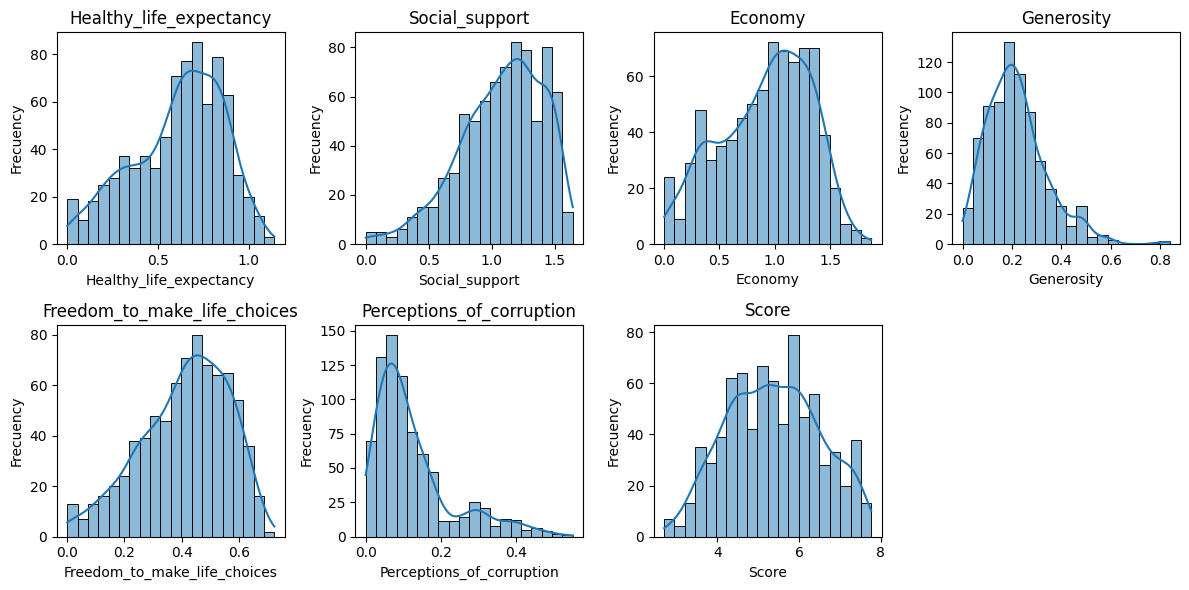

In [26]:
plt.figure(figsize=(12, 6))

numeric_columns = ['Healthy_life_expectancy', 'Social_support', 'Economy', 'Generosity',
                   'Freedom_to_make_life_choices', 'Perceptions_of_corruption', 'Score']

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[col], bins=20, kde=True)  
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frecuency')

plt.tight_layout()
plt.show()

**Distribution Analysis of Indicators**

**Healthy Life Expectancy** 🌱
- **Distribution**: Slightly right-skewed.
- **Range**: Concentrated between 0.5 and 1.0.
- **Implication**: Many countries have moderate to high healthy life expectancy, though some exhibit lower values.

**Social Support** 🤗
- **Distribution**: Also right-skewed.
- **Range**: Most countries score between 0.5 and 1.5.
- **Implication**: Generally high levels of social support across countries.

**Economy (GDP per Capita)** 💰
- **Distribution**: Right-skewed.
- **Range**: Values concentrated between 0.5 and 1.5.
- **Implication**: Majority of countries have medium-level economies, with fewer countries at the extremes.

**Generosity** 🎁
- **Distribution**: Significantly right-skewed.
- **Range**: Most values around 0.2.
- **Implication**: Generosity levels are generally low to moderate in most countries.

**Freedom to Make Life Choices** 🕊️
- **Distribution**: Slight positive skew.
- **Range**: Concentrated between 0.3 and 0.6.
- **Implication**: Most individuals experience a moderate level of freedom in their life choices.

**Perceptions of Corruption** 🕵️‍♂️
- **Distribution**: Highly left-skewed.
- **Range**: Most values between 0.0 and 0.3.
- **Implication**: High perception of corruption in many countries.

**Happiness Score** 😊
- **Distribution**: Approximately normal with slight right skew.
- **Range**: Most scores between 4 and 6.
- **Implication**: General well-being is in a moderate range across countries.


#### **Outliers**:

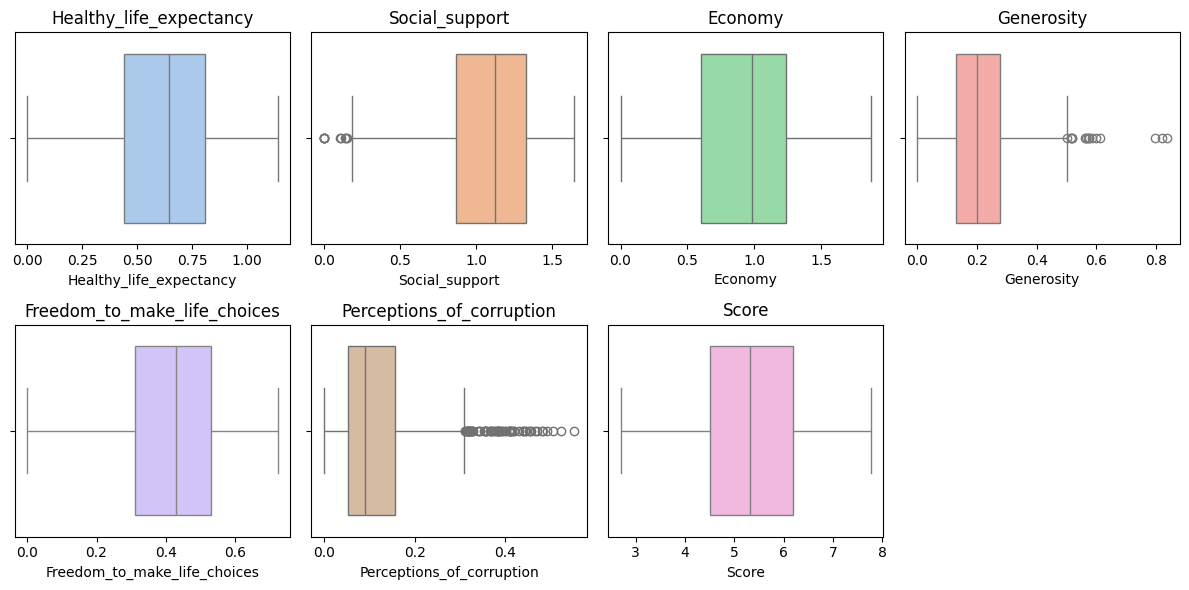

In [29]:
plt.figure(figsize=(12, 6))

palette = sns.color_palette("pastel")

numeric_columns = ['Healthy_life_expectancy', 'Social_support', 'Economy', 'Generosity',
                   'Freedom_to_make_life_choices', 'Perceptions_of_corruption', 'Score']

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df[col], color=palette[i % len(palette)])  
    plt.title(col)

plt.tight_layout()
plt.show()

**Outliers analysis**

- **Healthy_life_expectancy (Health)**: The median is around **0.7**, with an interquartile range of approximately **0.5 to 1.0**. There are some outliers on the lower end, indicating countries with a low contribution of life expectancy to happiness scores. 🏥

- **Social_support**: The median for this factor is around **1.0**, and most values are distributed between **0.75 and 1.25**. Some lower outliers are observed, which may represent countries with less social support compared to others. 🤝

- **Economy (GDP per Capita)**: This boxplot shows a median close to **1.0**, with most values falling between **0.5 and 1.5**. There are no significant outliers, indicating a uniform distribution in terms of economic contribution to happiness scores. 💰

- **Generosity**: Generosity has a median around **0.2**, with an interquartile range from **0.1 to 0.3**. Several upper outliers suggest that some countries have unusually high levels of generosity compared to the majority. 🎁

- **Freedom_to_make_life_choices (Freedom)**: The median is around **0.4**, and the interquartile range covers approximately **0.3 to 0.5**. No significant outliers are observed in this variable. 🌍

- **Perceptions_of_corruption (Trust)**: Perceptions of corruption have a low median, around **0.15**, with many upper outliers. This indicates that in many countries, corruption has a low positive impact on happiness, although some countries have significantly higher perceptions of corruption. 🔍

- **Score (Happiness Score)**: The median is approximately **5.5**, with values distributed between **4 and 7**. No outliers are observed in the happiness score, suggesting a uniform distribution without extreme values. 😊

Given that these variables directly affect the happiness score, it is not advisable to remove the outliers. The outliers in factors such as generosity and perceptions of corruption represent variations in how each country contributes to happiness and can be relevant for analysis. Keeping these values may help to better understand how extreme factors influence the overall happiness score. 🌍

### 🔗 **Data Correlation**


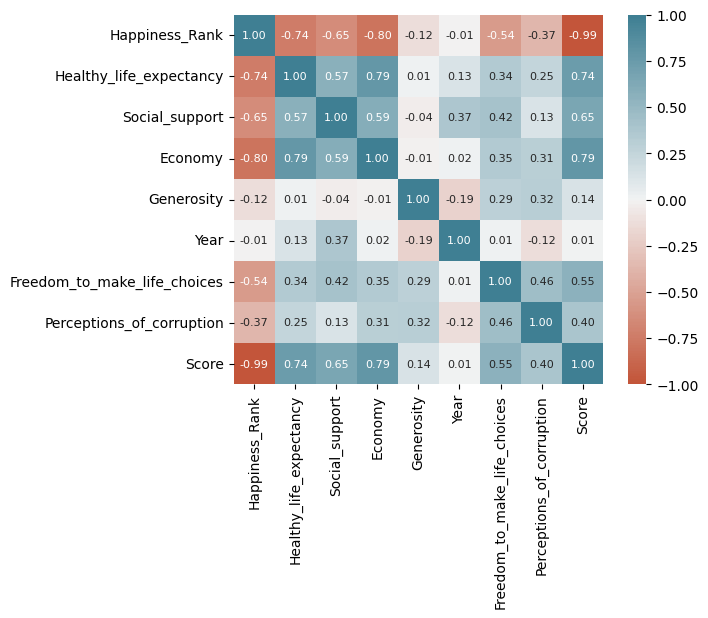

In [30]:
correlation= df.select_dtypes(include=[float, int]).corr()

ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

#### **General Conclusion**

- The happiness score is primarily driven by variables such as **Economy (0.79)**, **Healthy_life_expectancy (0.74)**, **Social_support (0.65)**, **Freedom_to_make_life_choices (0.55)** and **perception_of_corruption (0.40)**. In comparison,  **generosity (0.14)** have a lesser influence on the happiness score relative to these key factors. On the other hand, the nearly perfect negative correlation with **Happiness_Rank (-0.99)** is due to the fact that the rank is classified in reverse order: a lower rank indicates greater happiness. 🌟

- Additionally, **economy (GDP per capita)** has a strong positive correlation with **healthy life expectancy (0.79)** and is positively related to **social support (0.59)**,**freedom of choice (0.35)** and **perception_of_corruption (0.31)**. This suggests that a strong economy fosters better health conditions and social support 💪🌍, but also suggest a connection between strong economies, high perceptions of corruption. 


### 📊 **Data Visualization**

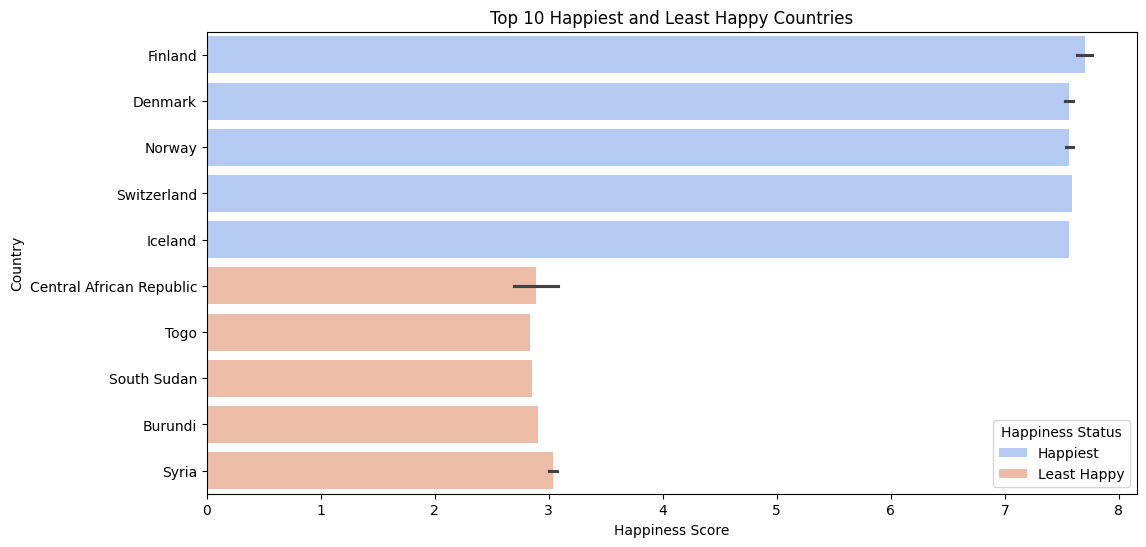

In [38]:
top_happy = df.nlargest(10, 'Score')[['Country', 'Score']]
bottom_happy = df.nsmallest(10, 'Score')[['Country', 'Score']]

top_bottom_happy = pd.concat([top_happy, bottom_happy])

top_bottom_happy['Happiness_Status'] = ['Happiest'] * 10 + ['Least Happy'] * 10

plt.figure(figsize=(12, 6))
sns.barplot(data=top_bottom_happy, x='Score', y='Country', hue='Happiness_Status', palette='coolwarm')
plt.title('Top 10 Happiest and Least Happy Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.legend(title='Happiness Status')
plt.show()

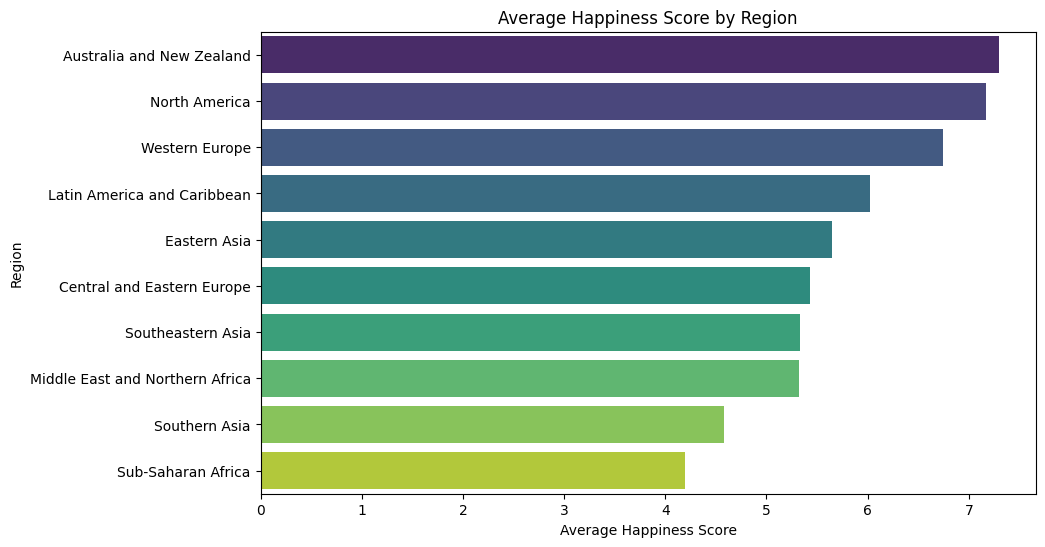

In [46]:
avg_happiness = df.groupby('Region')['Score'].mean().reset_index()

avg_happiness = avg_happiness.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_happiness, x='Score', y='Region', hue='Region', palette='viridis', legend=False)
plt.title('Average Happiness Score by Region')
plt.xlabel('Average Happiness Score')
plt.ylabel('Region')
plt.show()

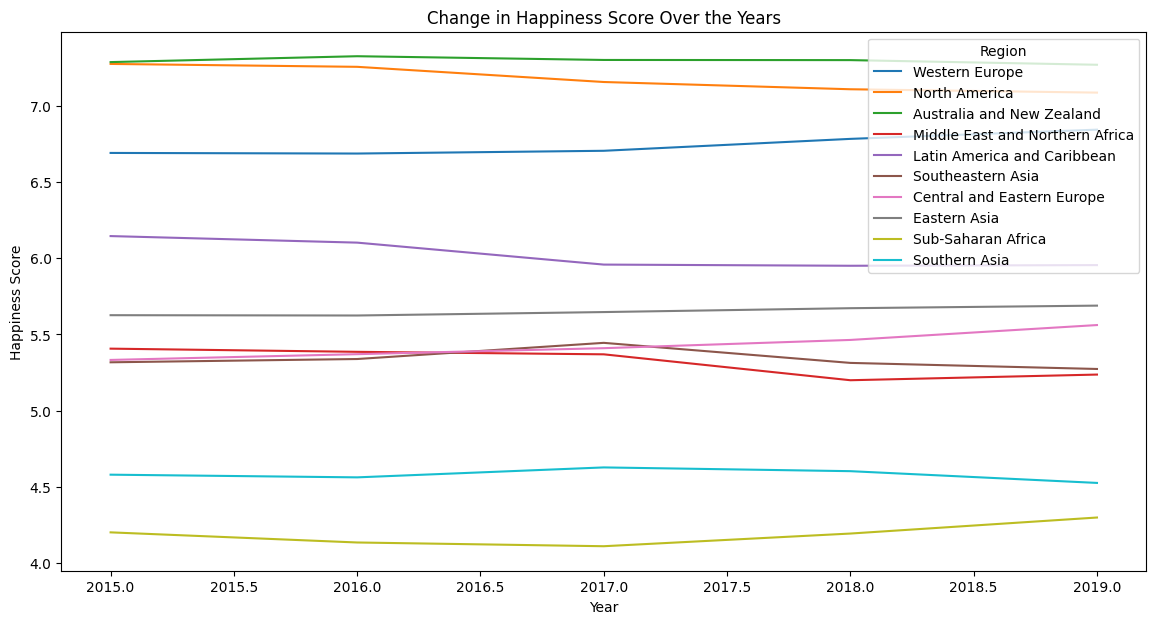

In [44]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Year', y='Score', hue='Region', estimator='mean', errorbar=None)
plt.title('Change in Happiness Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend(title='Region')
plt.show()

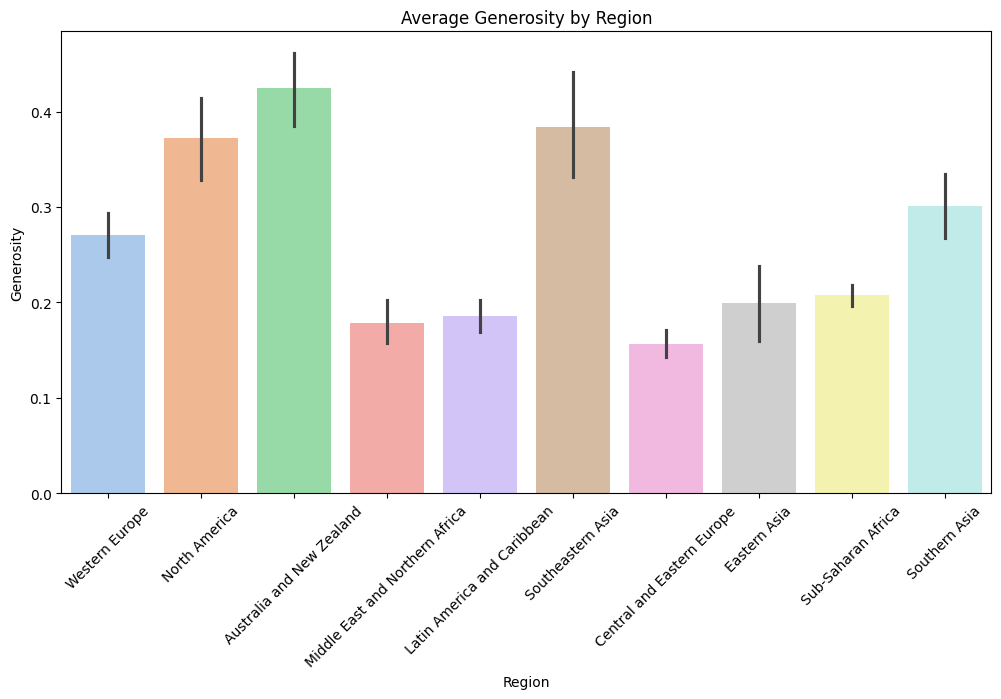

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Region', y='Generosity', estimator='mean', hue='Region', palette='pastel', legend=False)
plt.title('Average Generosity by Region')
plt.xticks(rotation=45)
plt.show()

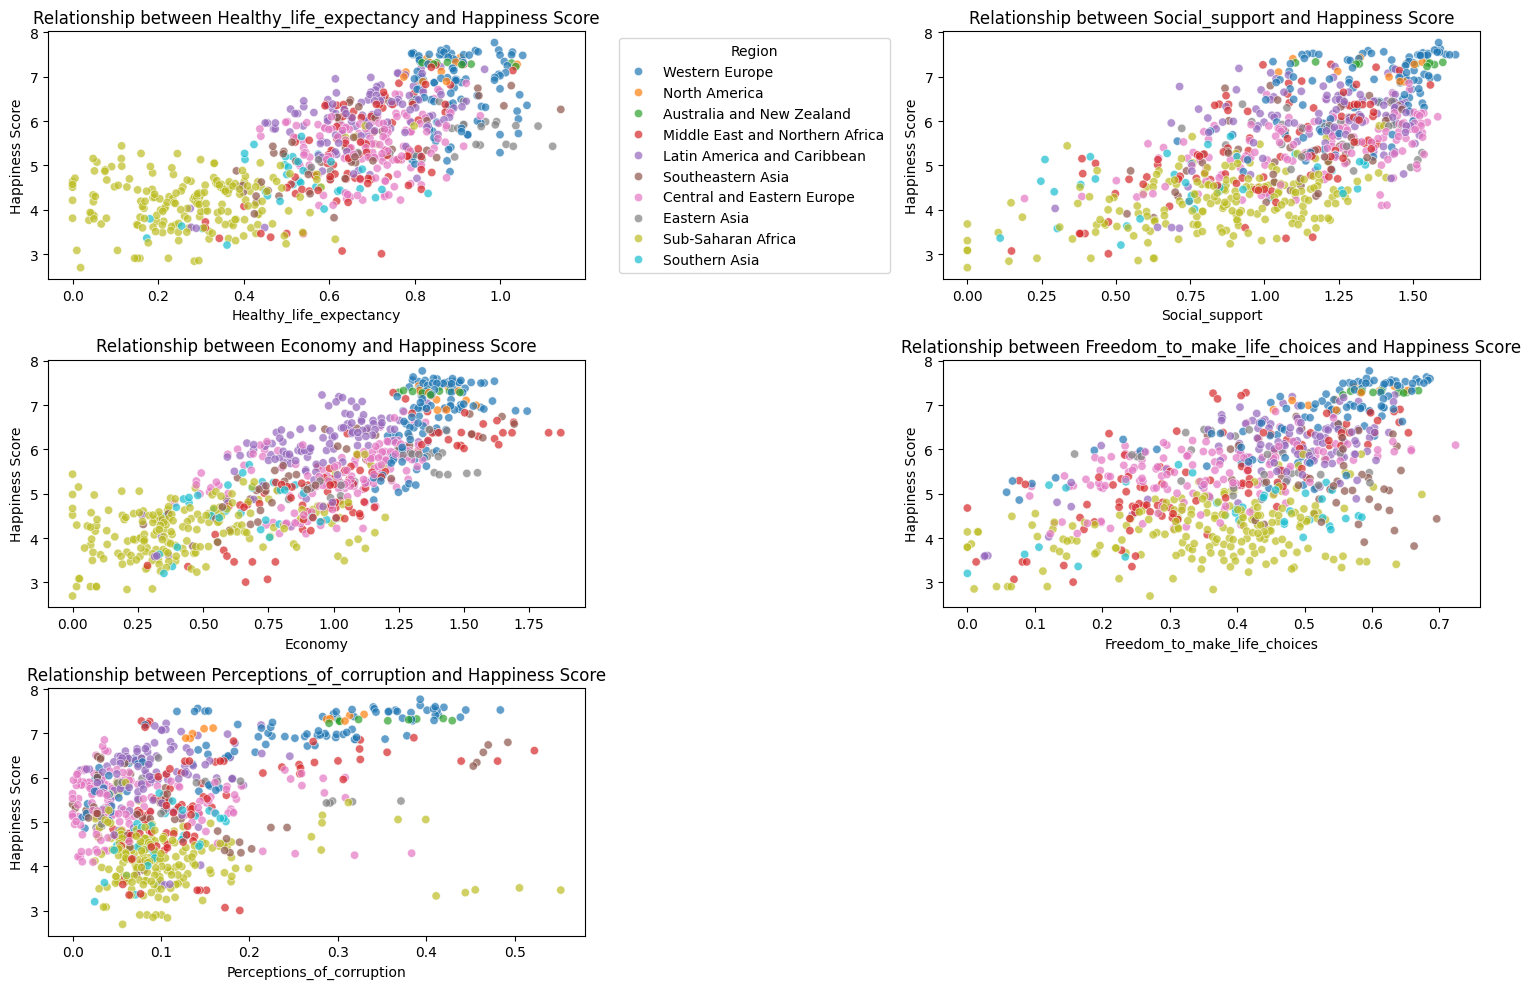

In [56]:
columns = [
    'Healthy_life_expectancy',
    'Social_support',
    'Economy',
    'Freedom_to_make_life_choices',
    'Perceptions_of_corruption'
]


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()  


for i, column in enumerate(columns):
    sns.scatterplot(data=df, x=column, y='Score', hue='Region', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Relationship between {column} and Happiness Score')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Happiness Score')
    

    if i == 0:
        axes[i].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[i].legend_.remove()  

if len(columns) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

---

### **Model training**

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import sys

In [23]:
df = pd.read_csv('../data/data_clean.csv')

In [24]:
df.head()

,Healthy_life_expectancy,Social_support,Country,Economy,Generosity,Year,Freedom_to_make_life_choices,Region,Perceptions_of_corruption,Score
0,0.94143,1.34951,Switzerland,1.39651,0.29678,2015,0.66557,Western Europe,0.41978,7.587
1,0.94784,1.40223,Iceland,1.30232,0.43630,2015,0.62877,Western Europe,0.14145,7.561
2,0.87464,1.36058,Denmark,1.32548,0.34139,2015,0.64938,Western Europe,0.48357,7.527
3,0.88521,1.33095,Norway,1.45900,0.34699,2015,0.66973,Western Europe,0.36503,7.522
4,0.90563,1.32261,Canada,1.32629,0.45811,2015,0.63297,North America,0.32957,7.427


In [25]:
df = pd.get_dummies(df, columns=['Region'], drop_first=True)

In [26]:
df.drop(columns=['Country','Hapiness_Rank'], axis=1, inplace=True)

In [27]:
X = df.drop(columns=['Score']) 
y = df['Score'] 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols)  
    ]
)

In [30]:
models = {
    'Linear_Regression': LinearRegression(),
    'Random_Forest': RandomForestRegressor(random_state=42),
    'Gradient_Boosting': GradientBoostingRegressor(random_state=42),
    'Support_Vector_Regression': SVR(),
    'KNN_Regression': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=42)
}

In [33]:
def evaluate_models(X_train, y_train, X_test, y_test, models):
    results = {}
    best_model_name = None
    best_r2 = -float('inf') 
    best_pipeline = None

    for model_name, model in models.items():
        pipeline = Pipeline(steps=[  
            ('preprocessor', preprocessor),
            ('regressor', model)  
        ])
        
        pipeline.fit(X_train, y_train)  
        
        y_pred = pipeline.predict(X_test) 
        
        mae = mean_absolute_error(y_test, y_pred)
        mse_value = mean_squared_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred) 
        r2 = r2_score(y_test, y_pred)

        results[model_name] = {
            'MAE': mae,
            'MSE': mse_value,
            'RMSE': rmse,
            'R²': r2
        }

        print("---------------------------------------------------------")
        print(f"{model_name} Results:")
        print(f"R²: {r2:.4f} \nMAE: {mae:.4f}, MSE: {mse_value:.4f}, RMSE: {rmse:.4f}")
        print("---------------------------------------------------------")
        
        if r2 > best_r2:
            best_r2 = r2
            best_model_name = model_name
            best_pipeline = pipeline

    if best_pipeline is not None:
        best_model_path = f'../models/best_model_{best_model_name}.pkl'
        joblib.dump(best_pipeline, f'../models/best_model_{best_model_name}.pkl')
        print(f"Best model saved as: ../models/best_model_{best_model_name}.pkl")



In [38]:
evaluate_models(X_train, y_train, X_test, y_test, models)

old_stdout = sys.stdout
sys.stdout = StringIO()

output = sys.stdout.getvalue()

sys.stdout = old_stdout

print(output)

---------------------------------------------------------
Linear_Regression Results:
R²: 0.7632 
MAE: 0.4201, MSE: 0.2957, RMSE: 0.5438
---------------------------------------------------------


---------------------------------------------------------
Random_Forest Results:
R²: 0.8170 
MAE: 0.3723, MSE: 0.2285, RMSE: 0.4780
---------------------------------------------------------
---------------------------------------------------------
Gradient_Boosting Results:
R²: 0.8025 
MAE: 0.3916, MSE: 0.2466, RMSE: 0.4966
---------------------------------------------------------
---------------------------------------------------------
Support_Vector_Regression Results:
R²: 0.8144 
MAE: 0.3715, MSE: 0.2318, RMSE: 0.4814
---------------------------------------------------------
---------------------------------------------------------
KNN_Regression Results:
R²: 0.7914 
MAE: 0.3927, MSE: 0.2605, RMSE: 0.5104
---------------------------------------------------------
---------------------------------------------------------
XGBoost Results:
R²: 0.7836 
MAE: 0.3987, MSE: 0.2702, RMSE: 0.5199
---------------------------------------------------------
Best model saved as: ../models/best_mod